In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading file

In [3]:
df=pd.read_csv('BankNote_Authentication.csv')   

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [8]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

# EDA

### Univariate Analysis

In [9]:
sns.set_style("darkgrid")

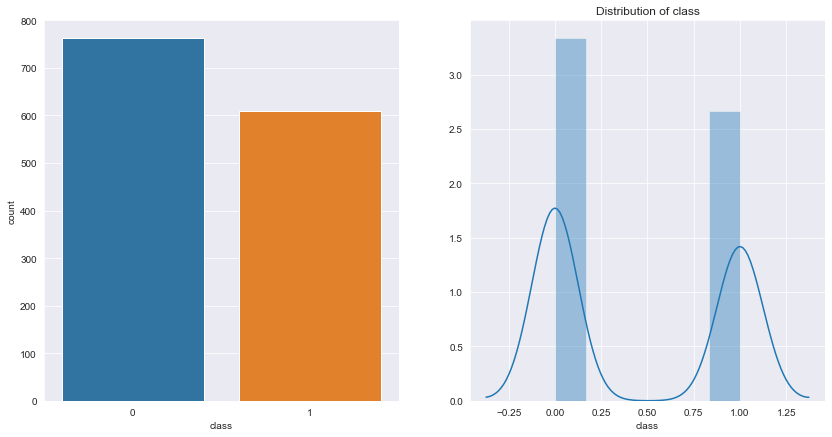

In [10]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.countplot(df["class"])

plt.subplot(1,2,2)
plt.title("Distribution of class")
sns.distplot(df["class"])

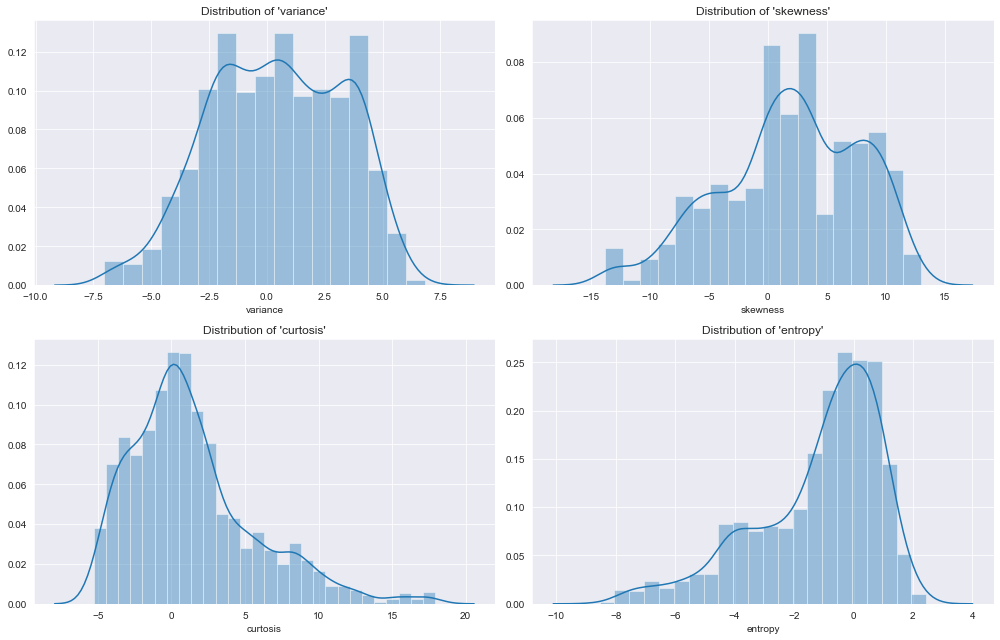

In [11]:
plt.figure(figsize=(14,9))

for i, col in enumerate(df.columns[:-1],1):
    plt.subplot(2,2,i);
    sns.distplot(df[col])
    plt.title("Distribution of '" + col + "'")
    plt.tight_layout()

### Bivariate Data Analysis

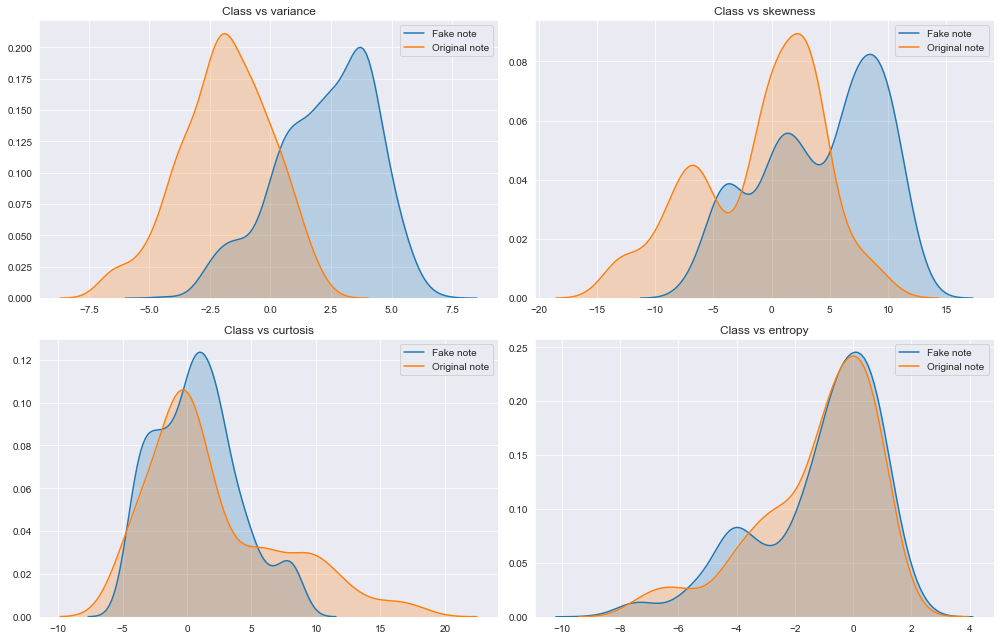

In [12]:
plt.figure(figsize=(14,9))

for i, col in enumerate(df.columns[:-1],1):
    plt.subplot(2,2,i);
    sns.kdeplot(df[col][df['class'] ==0], label = 'Fake note', shade=True, )
    sns.kdeplot(df[col][df['class'] ==1], label = 'Original note', shade=True)
    plt.title('Class vs ' + col)
    plt.tight_layout()

C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Divyansh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


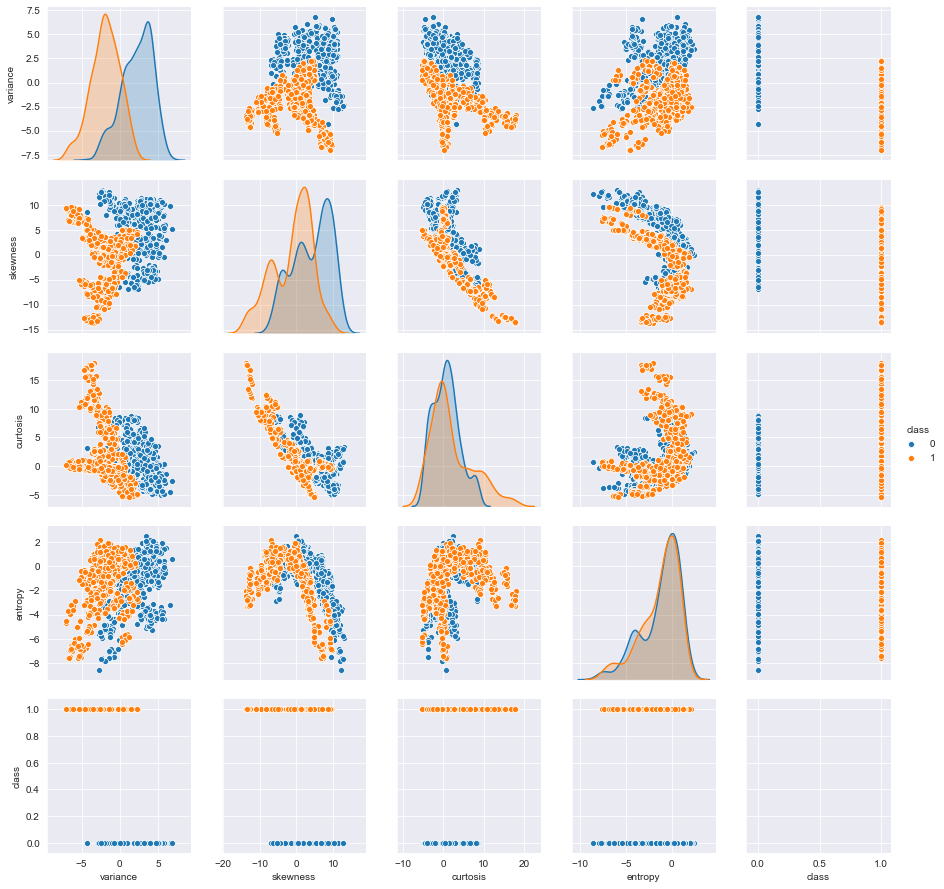

In [13]:
sns.pairplot(df, hue="class")

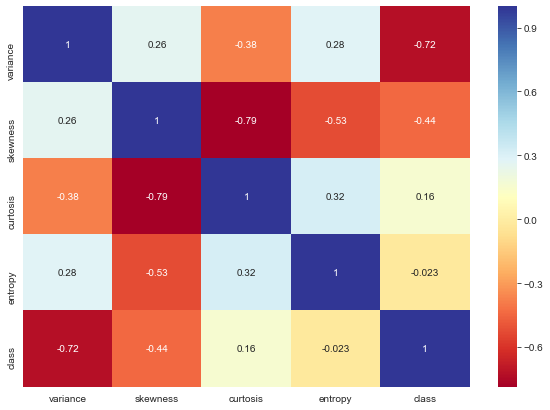

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap= 'RdYlBu')

### No multicollinearity can be seen between explanatory variables

# Building Model

### Splitting data

In [15]:
sc = StandardScaler()
X = df.drop("class", axis=1)
y = df["class"]

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)

### Defining Models

In [17]:
models = {
    "            Logistic Regression" : LogisticRegression(),
    "                            SVM" : SVC(),
    "                  Random Forest" : RandomForestClassifier(),
    "K Nearest Neighbours Classifier" : KNeighborsClassifier()
}

In [18]:
def train():
    for name, model in models.items():
        model.fit(X_train, y_train)
        print(name + " trained.")

In [19]:
def test():
    for name, model in models.items():
        print(name)
        print("--------------------"*3)
        print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
        print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
        print("--------------------"*3)
        print('\n')    

In [20]:
def evalModel():
    for name, model in models.items():
        print(name)
        print("\nConfusion Matrix")
        predictions = model.predict(X_test)
        print(confusion_matrix(y_test,predictions))
        sns.heatmap(confusion_matrix(y_test,predictions), annot=True)
        plt.show()
        print("\nClassifiation Report")
        print(classification_report(y_test,predictions))
        print("==="*40)

# Training

In [21]:
train()

            Logistic Regression trained.
                            SVM trained.
                  Random Forest trained.
K Nearest Neighbours Classifier trained.


# Testing

In [22]:
test()

            Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.98544
Training Accuracy: 0.98021
------------------------------------------------------------


                            SVM
------------------------------------------------------------
Testing Accuracy: 1.00000
Training Accuracy: 1.00000
------------------------------------------------------------


                  Random Forest
------------------------------------------------------------
Testing Accuracy: 0.99029
Training Accuracy: 1.00000
------------------------------------------------------------


K Nearest Neighbours Classifier
------------------------------------------------------------
Testing Accuracy: 0.99757
Training Accuracy: 0.99896
------------------------------------------------------------




### Cross Validation

In [23]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=5))
    print("-----------------------------------------------------")

            Logistic Regression 

[1.         1.         0.96385542 0.98780488 0.97530864]
-----------------------------------------------------
                            SVM 

[1.         1.         0.98795181 1.         1.        ]
-----------------------------------------------------
                  Random Forest 

[1.         0.97590361 0.96385542 0.93902439 0.98765432]
-----------------------------------------------------
K Nearest Neighbours Classifier 

[1.         1.         0.97590361 1.         0.98765432]
-----------------------------------------------------


### Evaluation

            Logistic Regression

Confusion Matrix
[[232   6]
 [  0 174]]


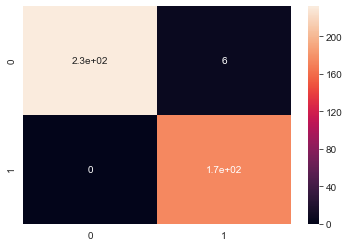


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       238
           1       0.97      1.00      0.98       174

    accuracy                           0.99       412
   macro avg       0.98      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

                            SVM

Confusion Matrix
[[238   0]
 [  0 174]]


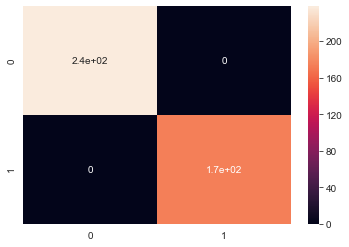


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

                  Random Forest

Confusion Matrix
[[234   4]
 [  0 174]]


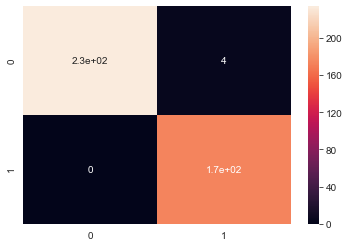


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

K Nearest Neighbours Classifier

Confusion Matrix
[[237   1]
 [  0 174]]


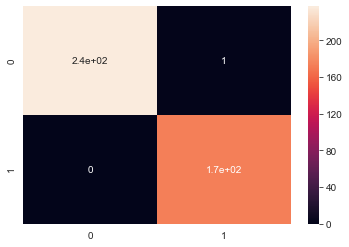


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.99      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [24]:
evalModel()

# Lets try tuning parameters

### Logistic Regression

In [25]:
param_grid = {'penalty': ['l1', 'l2'],
              'C':[0.001,.009,0.01,.09,1,5,10,25]
             }

grid = GridSearchCV(LogisticRegression(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
grid.best_params_

{'C': 5, 'penalty': 'l1'}

### Random Forest

In [27]:
param_grid = { 'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [10, 15, 20]
             }

grid = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [28]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

### KNN

In [29]:
param_grid = { 'leaf_size' : [2,5,7,9,11],
               'n_neighbors' : [2,5,7,9,11],
               'p' : [1,2]    
             }

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

### Defining models again

In [31]:
models = {
    "            Logistic Regression" : LogisticRegression(penalty="l1", C=5),
    "                            SVM" : SVC(),
    "                  Random Forest" : RandomForestClassifier(bootstrap=True, max_depth=20, max_features="auto", 
                                                               min_samples_leaf=1, min_samples_split=5, n_estimators=20),
    "K Nearest Neighbours Classifier" : KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2)
}

### Training

In [32]:
train()

            Logistic Regression trained.
                            SVM trained.
                  Random Forest trained.
K Nearest Neighbours Classifier trained.


### Testing

In [33]:
test()

            Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.99272
Training Accuracy: 0.98854
------------------------------------------------------------


                            SVM
------------------------------------------------------------
Testing Accuracy: 1.00000
Training Accuracy: 1.00000
------------------------------------------------------------


                  Random Forest
------------------------------------------------------------
Testing Accuracy: 0.99029
Training Accuracy: 1.00000
------------------------------------------------------------


K Nearest Neighbours Classifier
------------------------------------------------------------
Testing Accuracy: 0.99757
Training Accuracy: 1.00000
------------------------------------------------------------




### Cross Validation

In [34]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=5))
    print("-----------------------------------------------------")

            Logistic Regression 

[1.         1.         0.98795181 0.98780488 0.98765432]
-----------------------------------------------------
                            SVM 

[1.         1.         0.98795181 1.         1.        ]
-----------------------------------------------------
                  Random Forest 

[0.98795181 0.97590361 0.97590361 0.98780488 0.97530864]
-----------------------------------------------------
K Nearest Neighbours Classifier 

[1.         0.98795181 0.97590361 1.         1.        ]
-----------------------------------------------------


### Evaluation

            Logistic Regression

Confusion Matrix
[[235   3]
 [  0 174]]


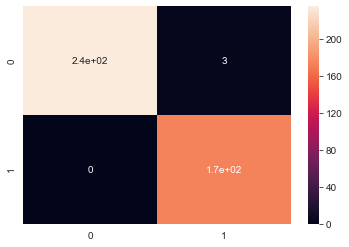


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

                            SVM

Confusion Matrix
[[238   0]
 [  0 174]]


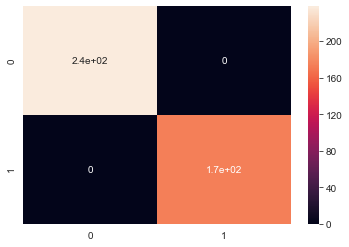


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

                  Random Forest

Confusion Matrix
[[234   4]
 [  0 174]]


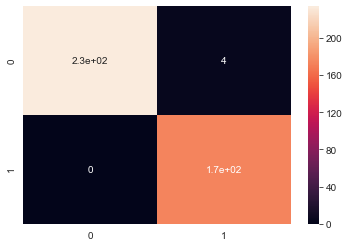


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

K Nearest Neighbours Classifier

Confusion Matrix
[[237   1]
 [  0 174]]


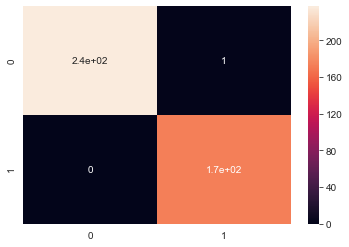


Classifiation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.99      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [35]:
evalModel()

**After hypertuning the accuracies didnt change but other metrics like f1 score showed some improvement for Logistic Regression**